# Importing Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

# Importing the Dataset

In [7]:
data = pd.read_csv('Store Sales Data.csv',encoding = 'unicode_escape')

# Sanity Check

In [8]:
# to print the shape of the data
data.shape

(11251, 15)

In [9]:
# to get the first 3 rows
data.head(3)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN


In [11]:
# to get the last 3 rows
data.tail(3)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [13]:
# To print the concise summary of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# Data Cleaning and Manipulation

In [14]:
#Drop unrelated/blank columns
data.drop(['Status','unnamed1'],axis = 1, inplace = True) 

In [15]:
 #Checking for the null values in the dataset
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [16]:
#Drop the null values
data.dropna(inplace = True)

In [17]:
#changing the data type of Amount from float to int, we use astype()
data['Amount'] = data['Amount'].astype('int64')

In [18]:
# To generate the descriptive statistics of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,11239.0,1.003004e+06,1716.038826,1000001.0,1001491.5,1003064.0,1004426.5,1006040.0
Age,11239.0,3.541036e+01,12.753866,12.0,27.0,33.0,43.0,92.0
Marital_Status,11239.0,4.200552e-01,0.493589,0.0,0.0,0.0,1.0,1.0
Orders,11239.0,2.489634e+00,1.114967,1.0,2.0,2.0,3.0,4.0
Amount,11239.0,9.453611e+03,5222.355168,188.0,5443.0,8109.0,12675.0,23952.0


In [19]:
#To find whether there is any duplicates values in the dataset
data.duplicated().sum()

8

In [20]:
# To drop duplicate values
data.drop_duplicates()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


# Exploratory Data Analysis (EDA)

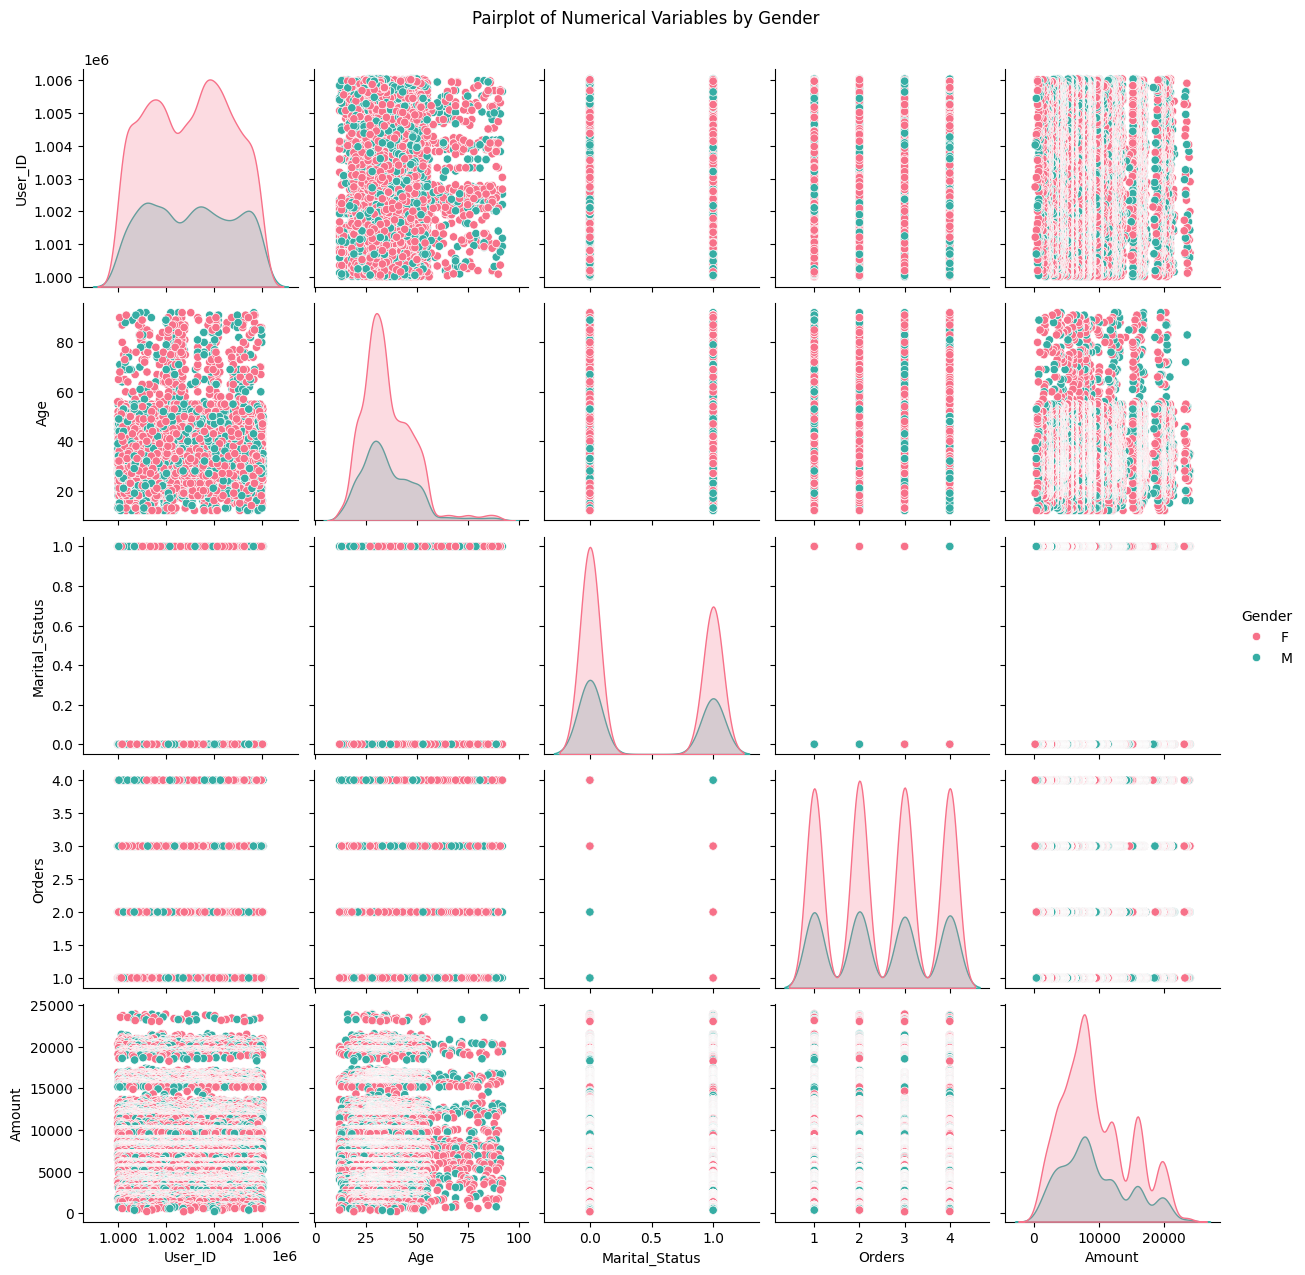

In [23]:
# To visualize the Pairplot of Data
sns.pairplot(data, hue = 'Gender', palette = 'husl')
plt.suptitle('Pairplot of Numerical Variables by Gender', y = 1.02)
plt.show()

In [22]:
# To get the info about the columns
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Barplot of Numerical Features

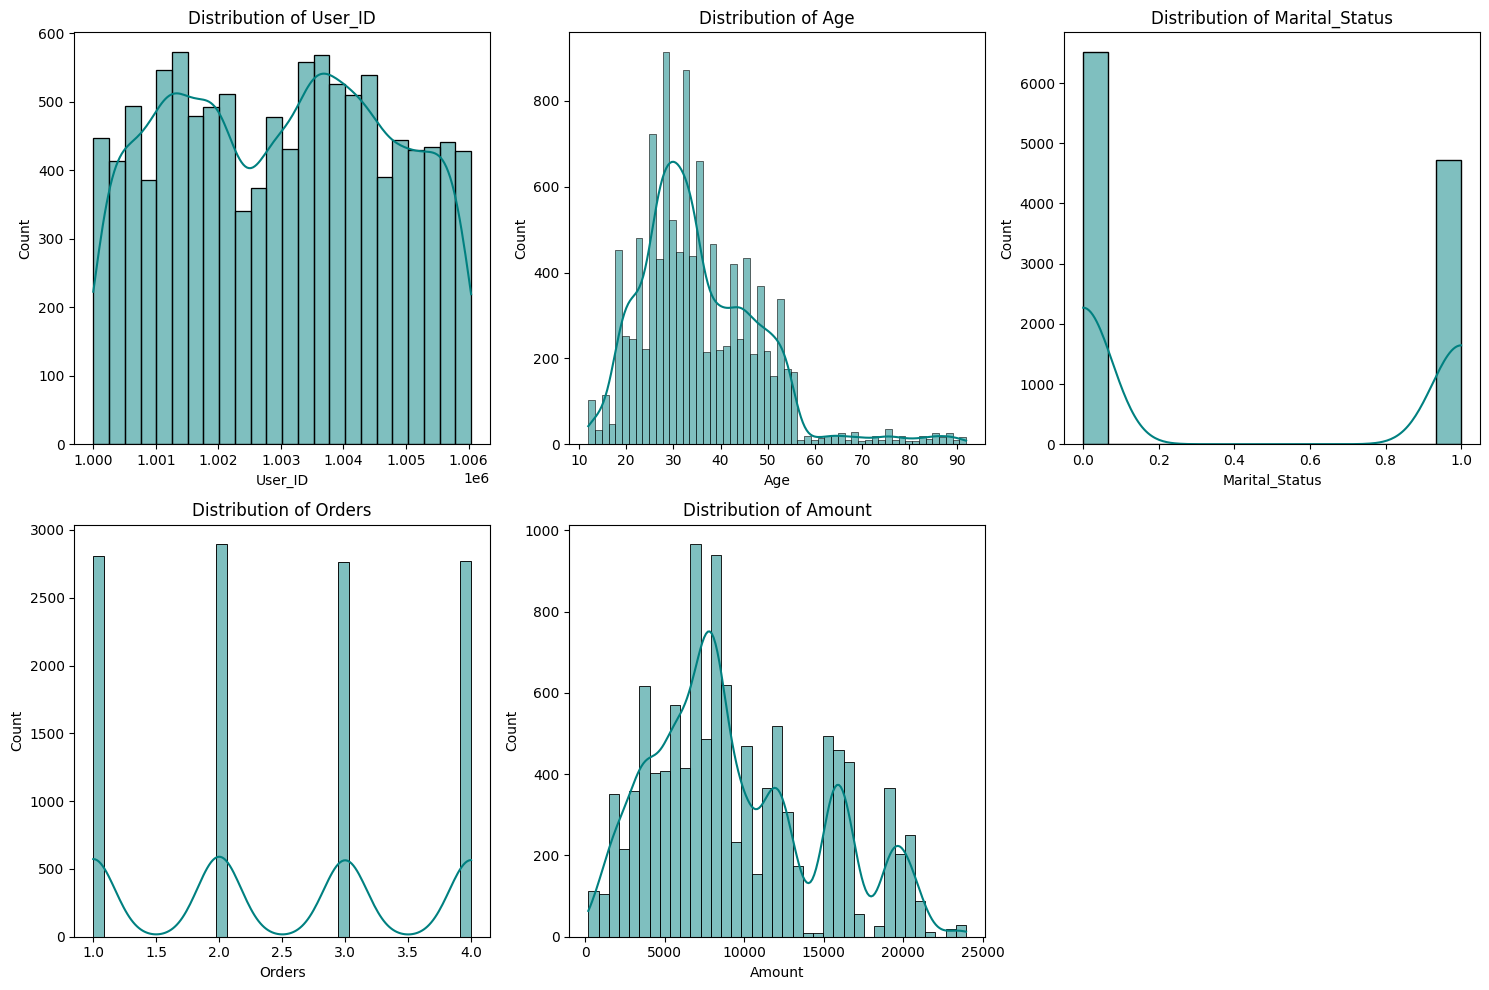

In [24]:
plt.figure(figsize = (15, 10))
numerical_cols = data.select_dtypes(include = 'number').columns

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3 , i+1)
    sns.histplot(data[col], kde = True, color = 'teal')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Barplot of Categorical Features

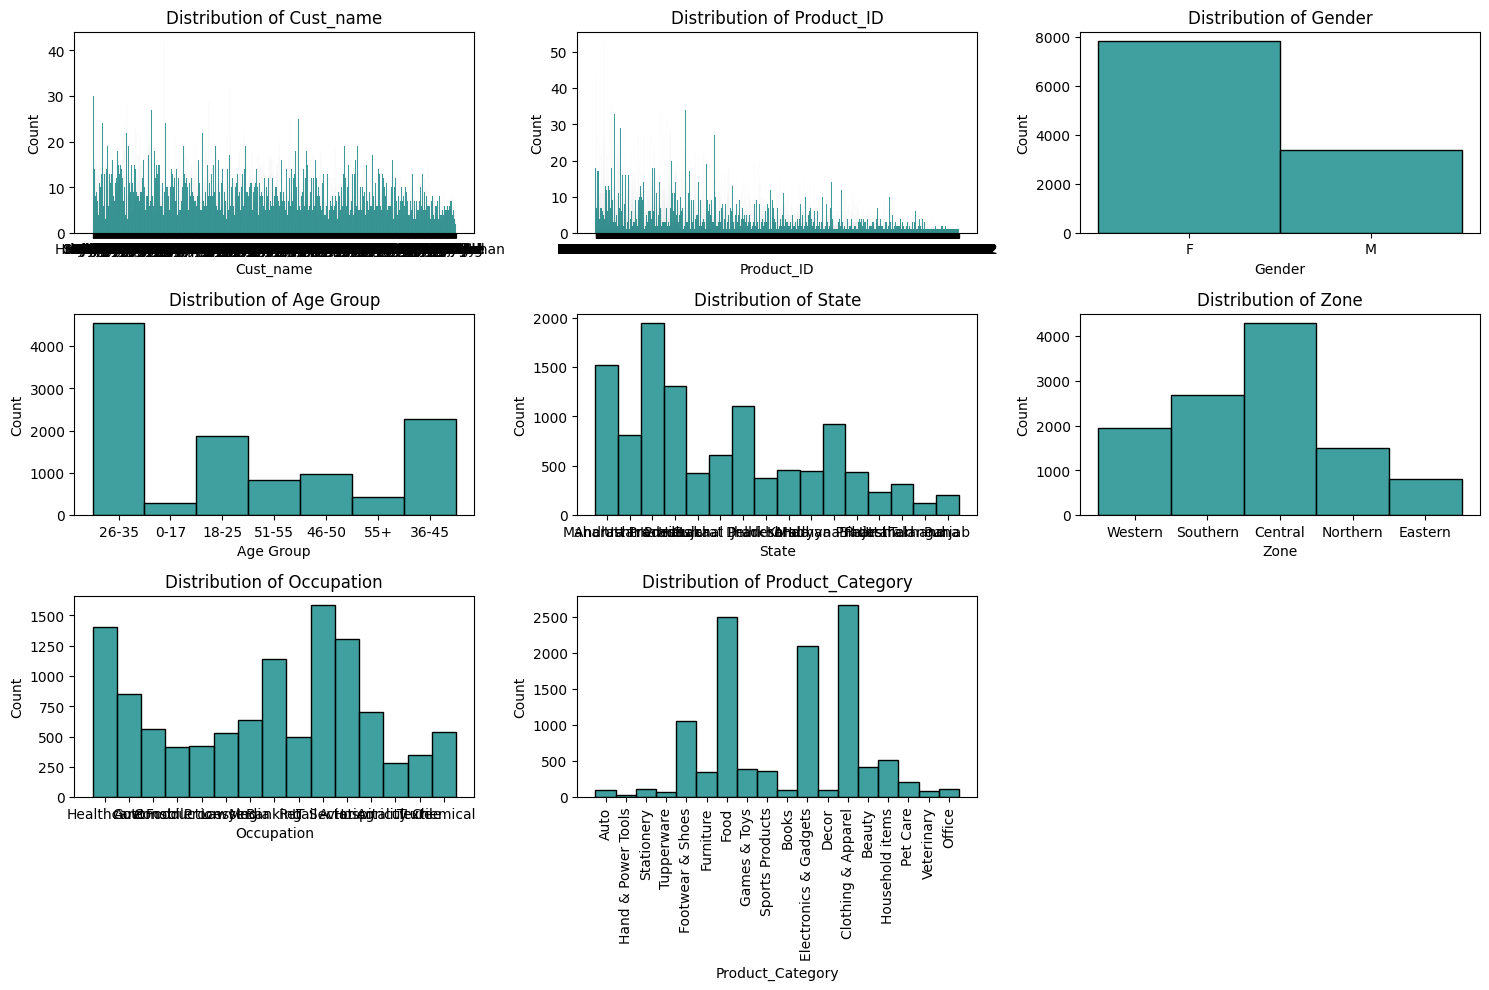

In [28]:
plt.figure(figsize = (15, 11))
categorical_cols = data.select_dtypes(include = 'object').columns
# categorical_cols = categorical_cols.drop('Date')

for i, col in enumerate(categorical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(data[col], color = 'teal')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

# Gender Distribution

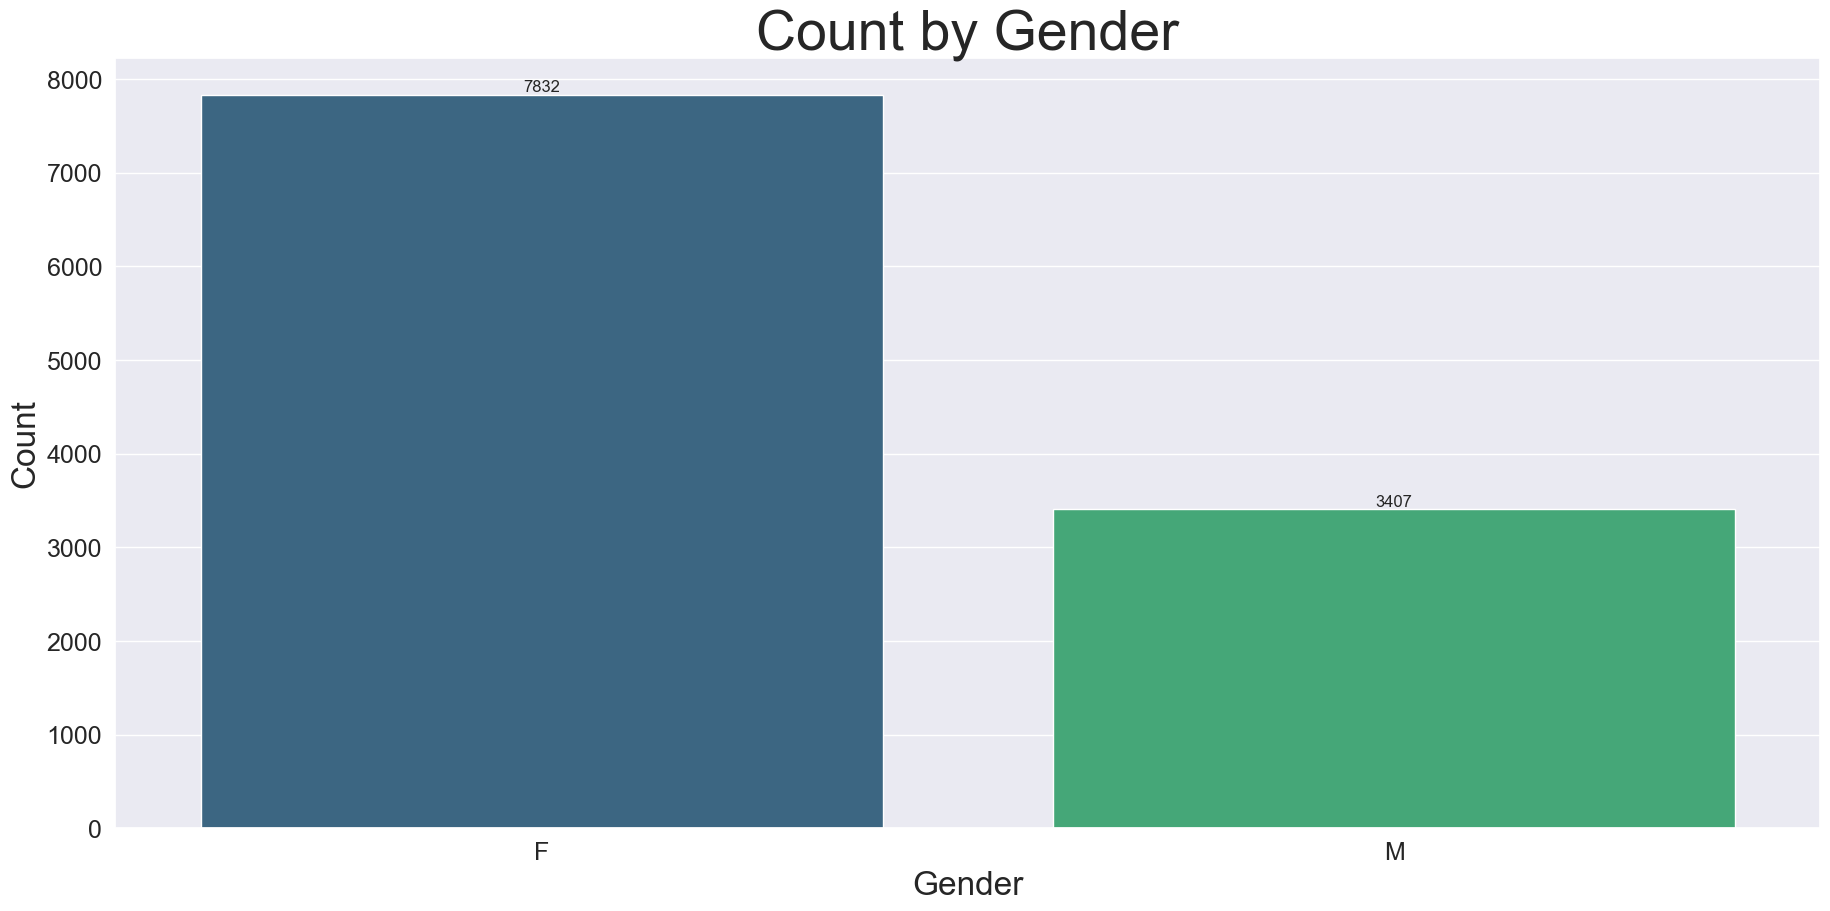

In [33]:
plt.figure(figsize = (22,10))
ax = sns.countplot(x = 'Gender',data = data,
                   palette = 'viridis')
for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc = {'figure.figsize': (5,4)})
plt.title("Count by Gender", fontsize = 40)
plt.xlabel("Gender", fontsize = 24)
plt.ylabel("Count", fontsize = 24)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

# Amount by Gender

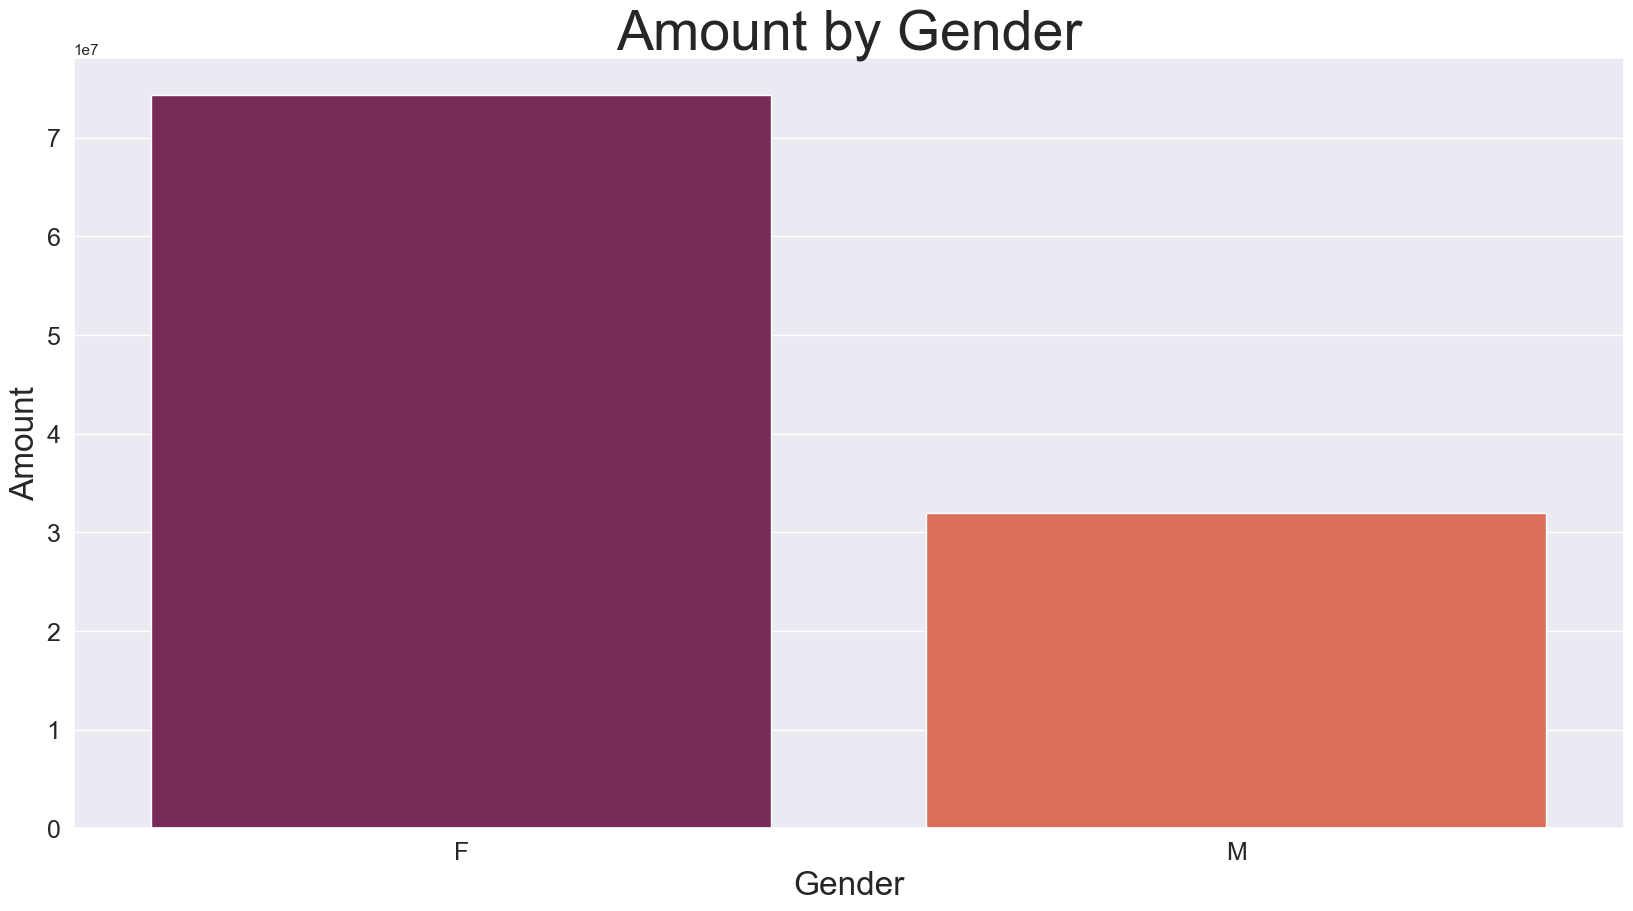

In [36]:
plt.figure(figsize = (20,10))
sales_gen = data.groupby(['Gender'],as_index = False) ['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Gender', 
            y = 'Amount',
            data = sales_gen, 
            palette = 'rocket')
plt.title("Amount by Gender",fontsize = 40)
plt.xlabel("Gender", fontsize = 24)
plt.ylabel("Amount", fontsize = 24)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

# Count by Age Group

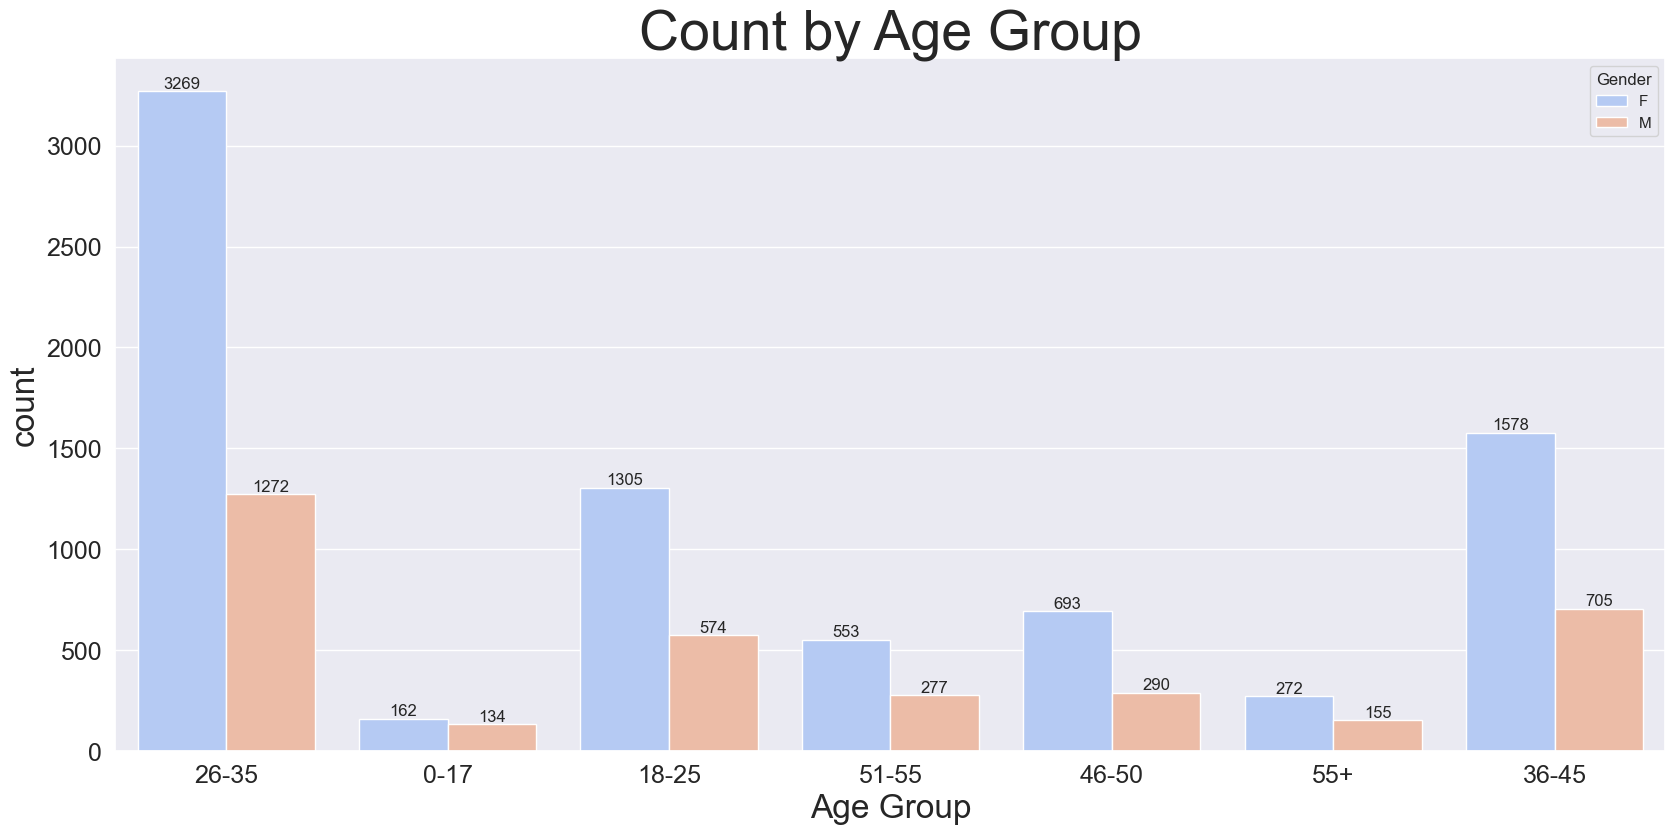

In [38]:
sns.set(rc={'figure.figsize': (20,9)})
ax = sns.countplot(data = data, x = 'Age Group', hue = 'Gender', palette = "coolwarm")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Count by Age Group",fontsize = 40)
plt.xlabel("Age Group", fontsize = 24)
plt.ylabel('count', fontsize = 24)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

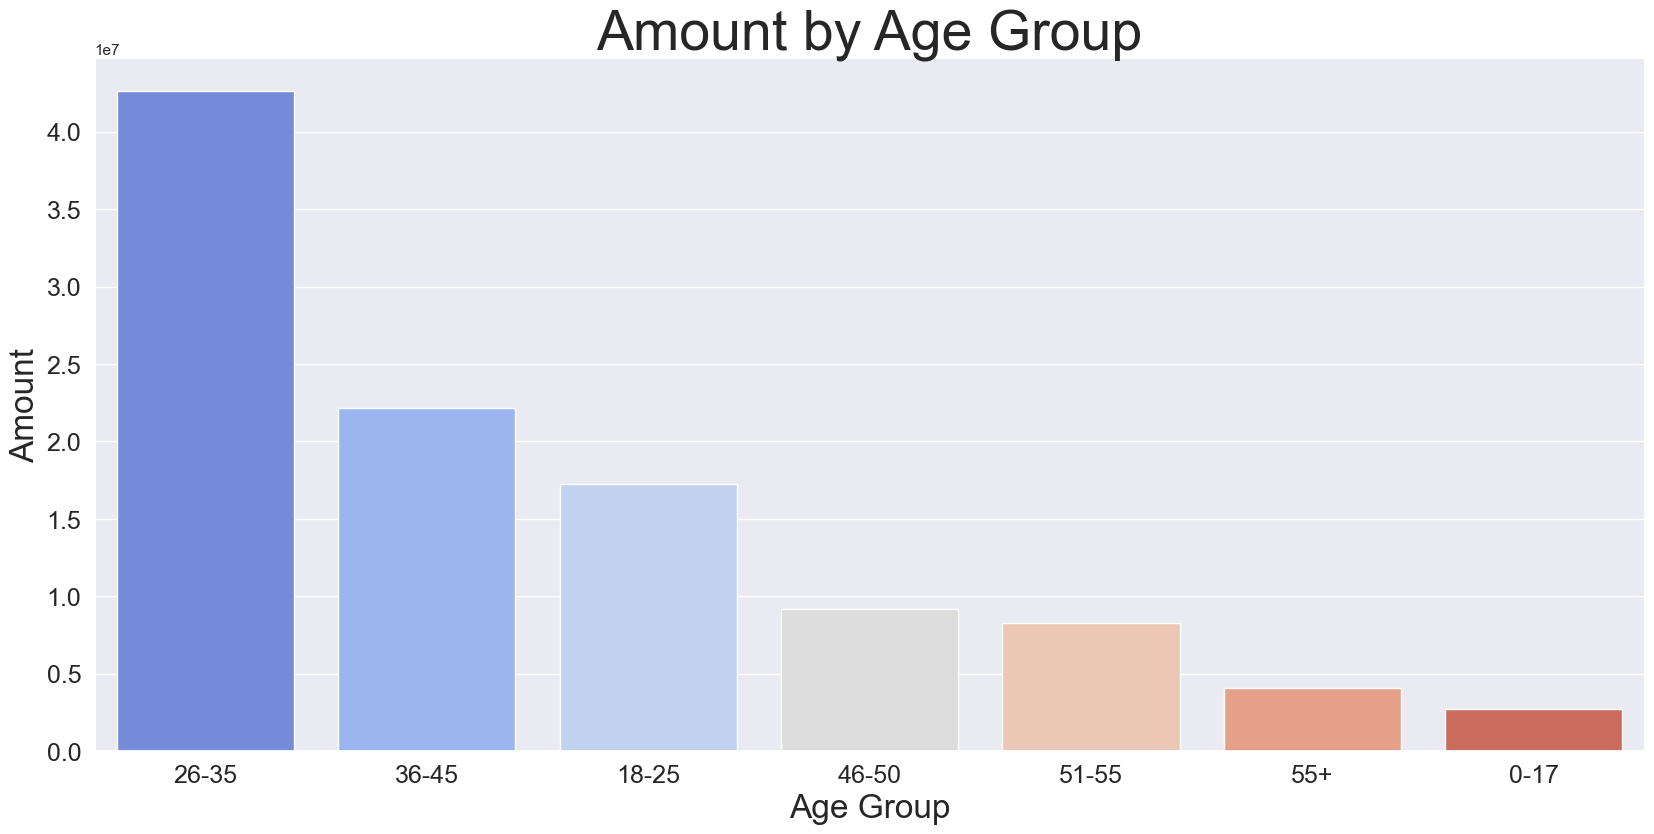

In [40]:
#Total Amount Vs Age Group
sns.set(rc={'figure.figsize': (20,9)})
sales_age = data.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Age Group', y = 'Amount',data = sales_age, palette = "coolwarm")
plt.title("Amount by Age Group", fontsize = 40)
plt.xlabel("Age Group", fontsize = 24)
plt.ylabel('Amount', fontsize = 24)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

# State

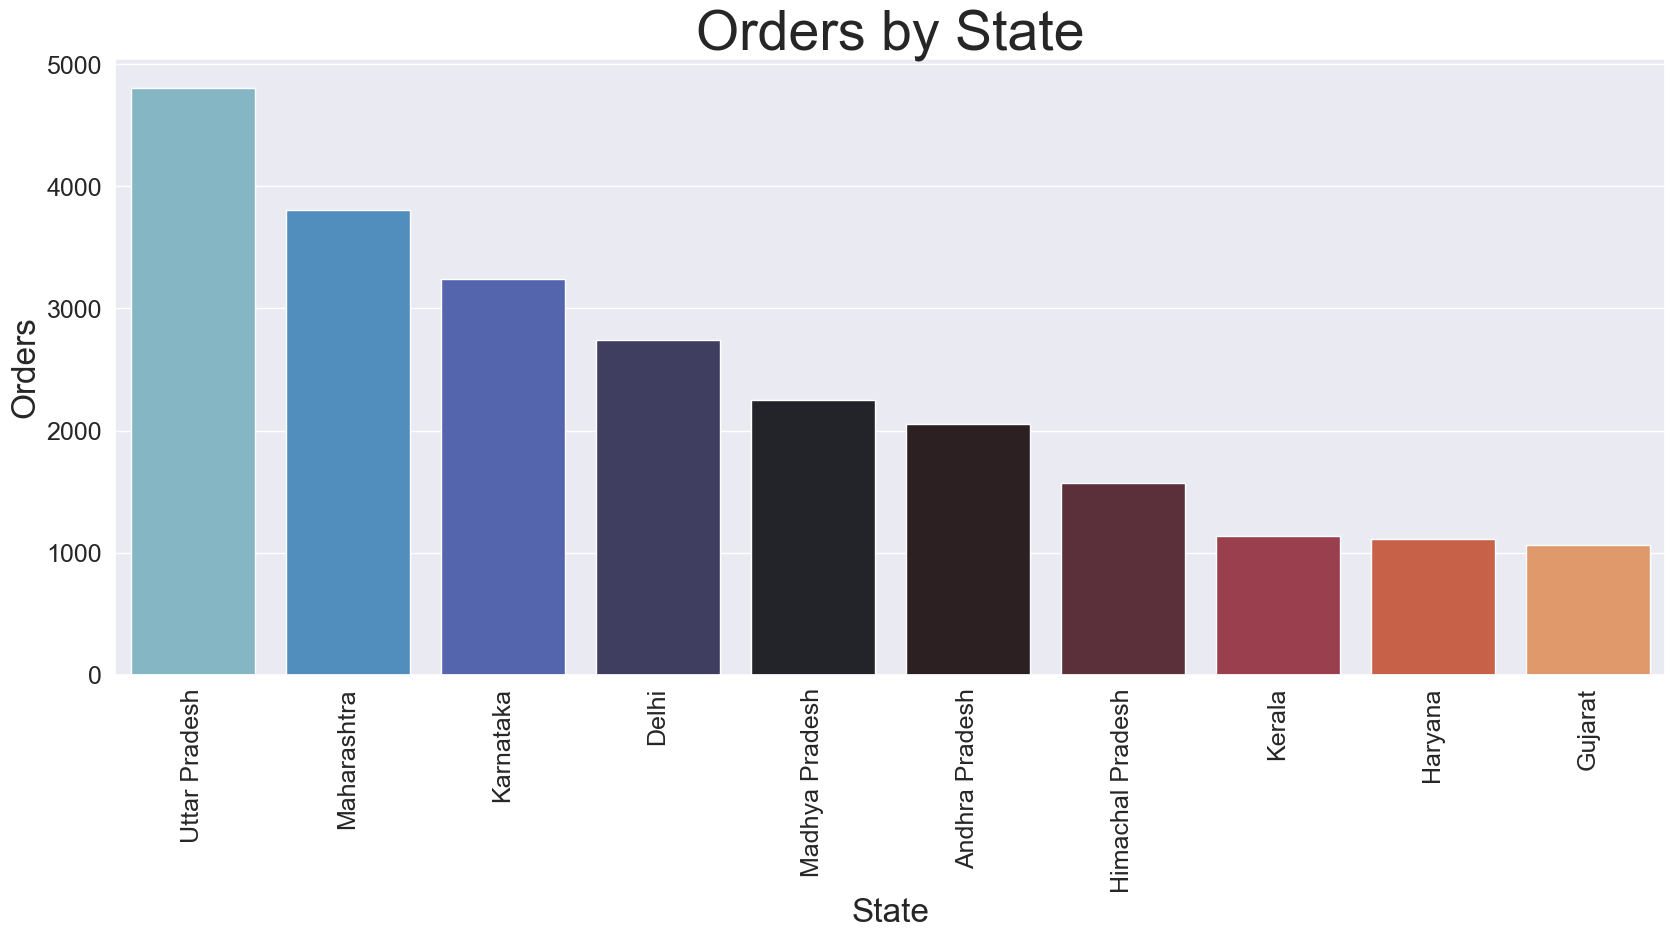

In [47]:
sns.set(rc={'figure.figsize': (20,9)})
sales_state = data.groupby(['State'], as_index = False) ['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.set(rc={'figure.figsize': (20,8)})
sns.barplot(data = sales_state, x = 'State', y =  'Orders',palette = 'icefire')
plt.title("Orders by State",fontsize = 40)
plt.xlabel("State", fontsize = 24)
plt.ylabel('Orders', fontsize = 24)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(rotation = 90)
plt.show()

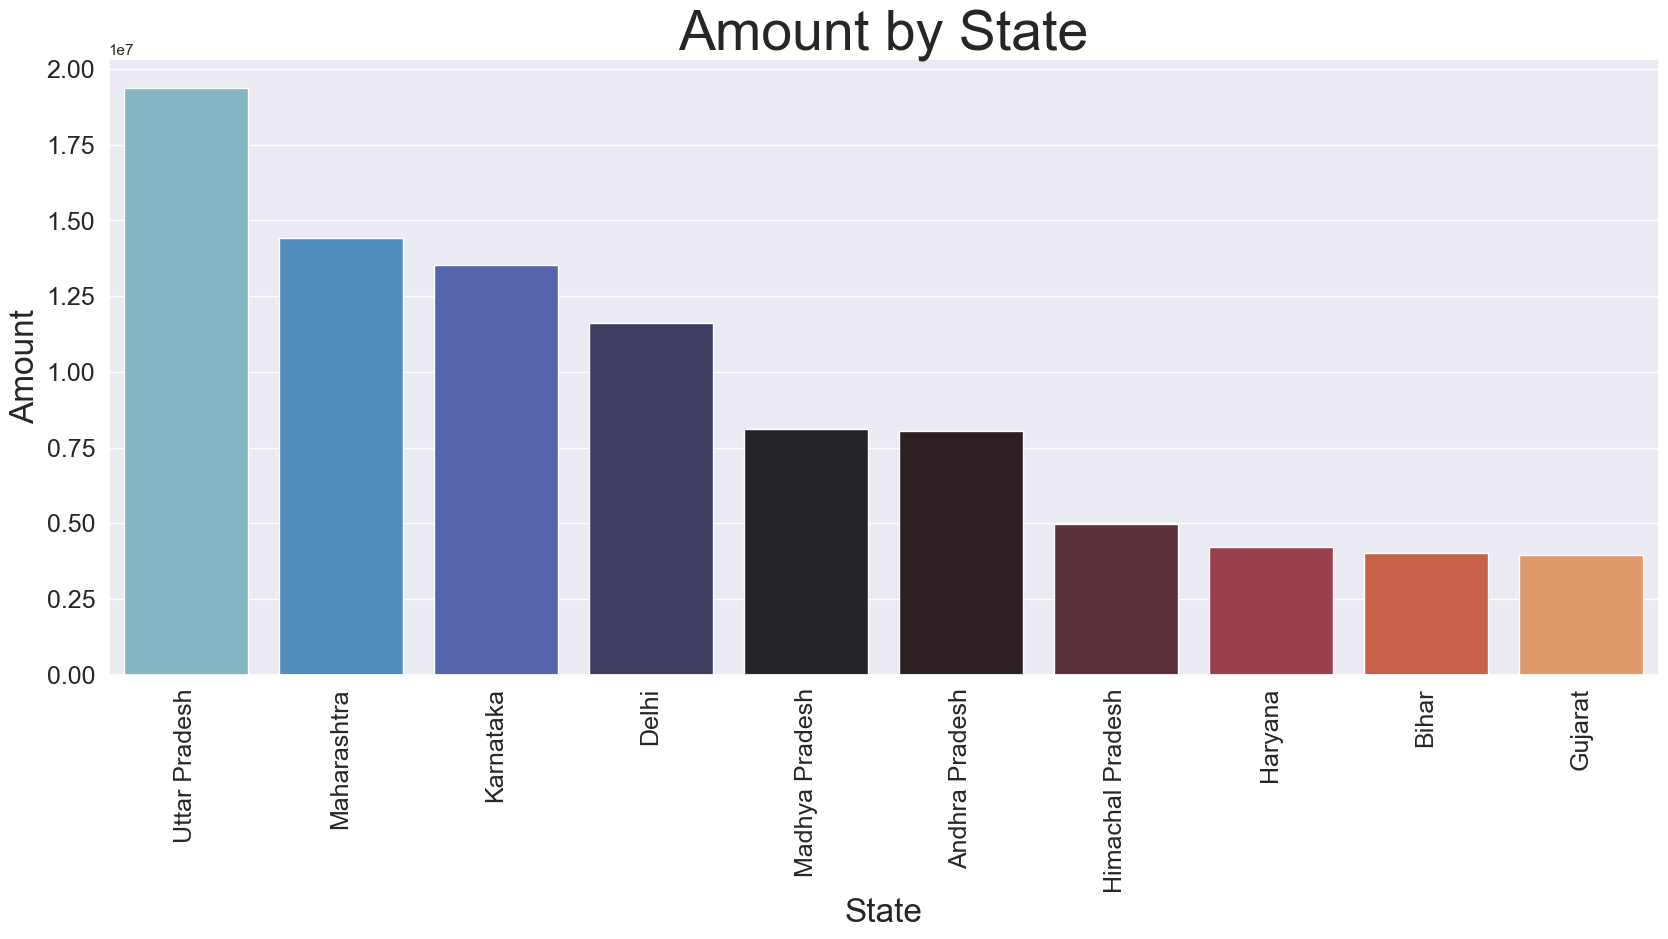

In [49]:
# Total Amount/Sales from top 10 states
sns.set(rc={'figure.figsize': (20,8)})
sales_state = data.groupby(['State'],as_index = False) ['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(10)
sns.barplot(data = sales_state, x = 'State', y = 'Amount', palette = 'icefire')
plt.title("Amount by State",fontsize = 40)
plt.xlabel("State", fontsize = 24)
plt.ylabel('Amount', fontsize = 24)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(rotation = 90)
plt.show()

# Marital Status

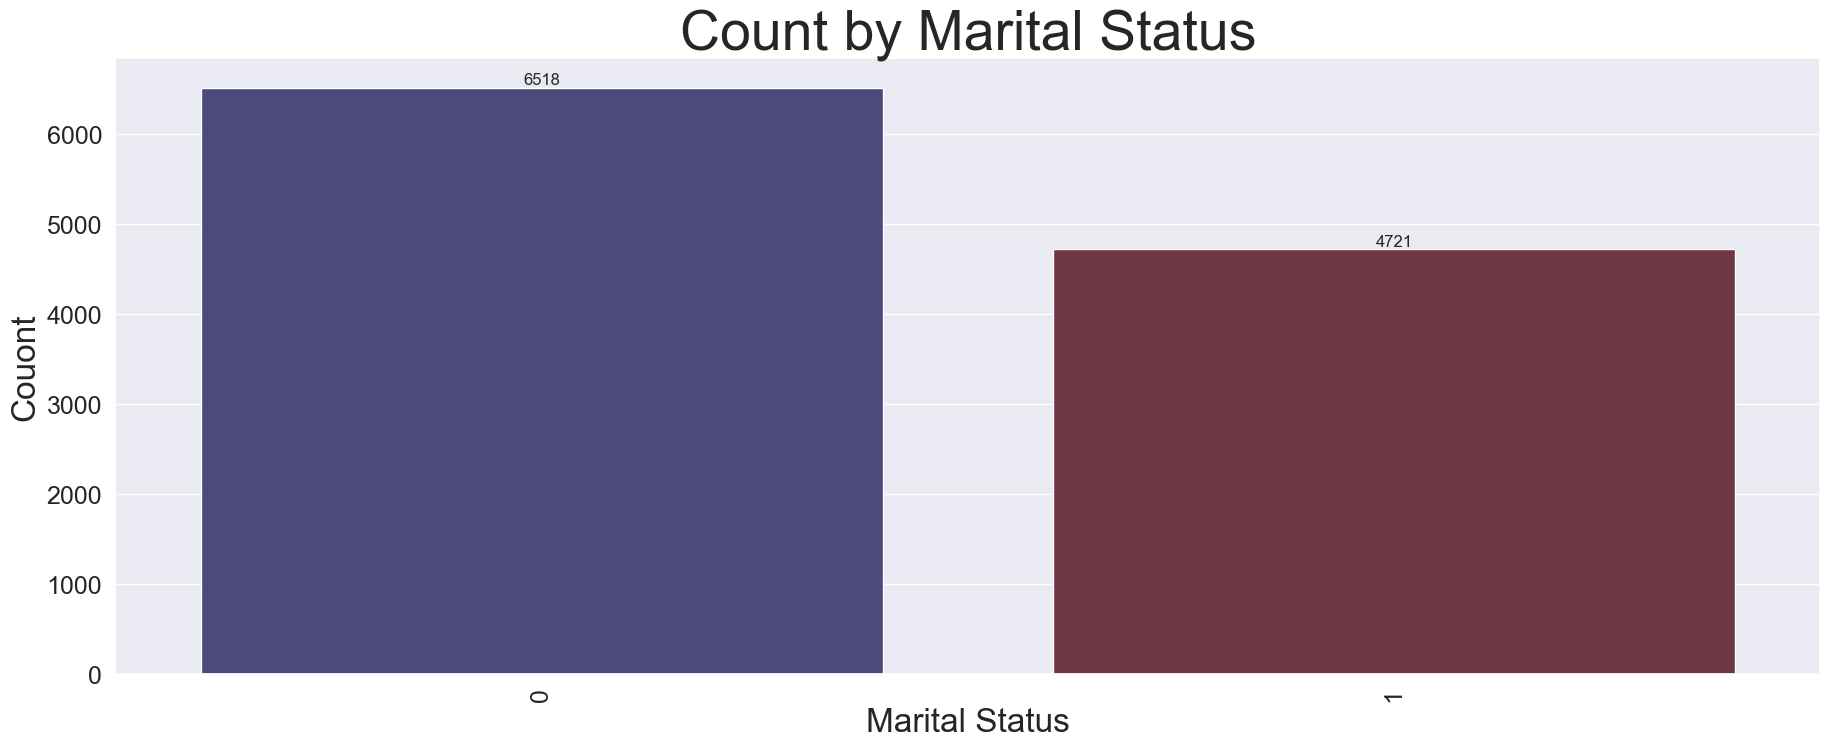

In [52]:
ax = sns.countplot (data = data, x = 'Marital_Status',palette = 'icefire')
sns.set(rc={'figure.figsize': (22,8)})
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Count by Marital Status",fontsize = 40)
plt.xlabel("Marital Status", fontsize = 24)
plt.ylabel('Couont', fontsize = 24)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(rotation = 90)
plt.show()

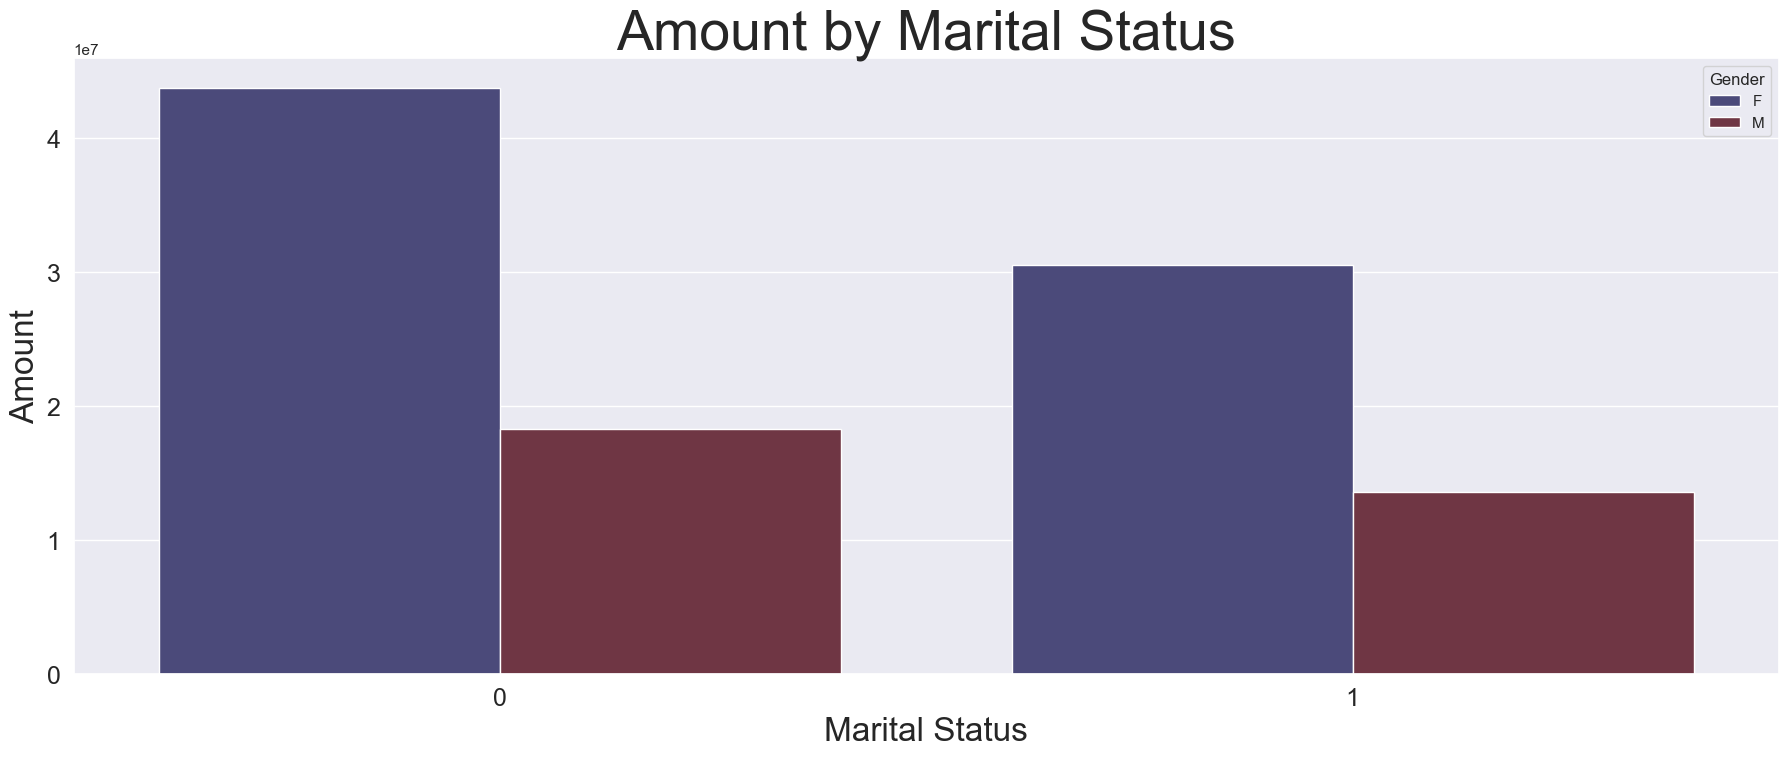

In [55]:
sns.set(rc={'figure.figsize': (22,8)})
Mar_status = data.groupby(['Marital_Status','Gender'],as_index = False) ['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.barplot(data = Mar_status, x = 'Marital_Status', y = 'Amount', hue='Gender', palette = 'icefire')
plt.title("Amount by Marital Status",fontsize = 40)
plt.xlabel("Marital Status", fontsize = 24)
plt.ylabel('Amount', fontsize = 24)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

# Occupation

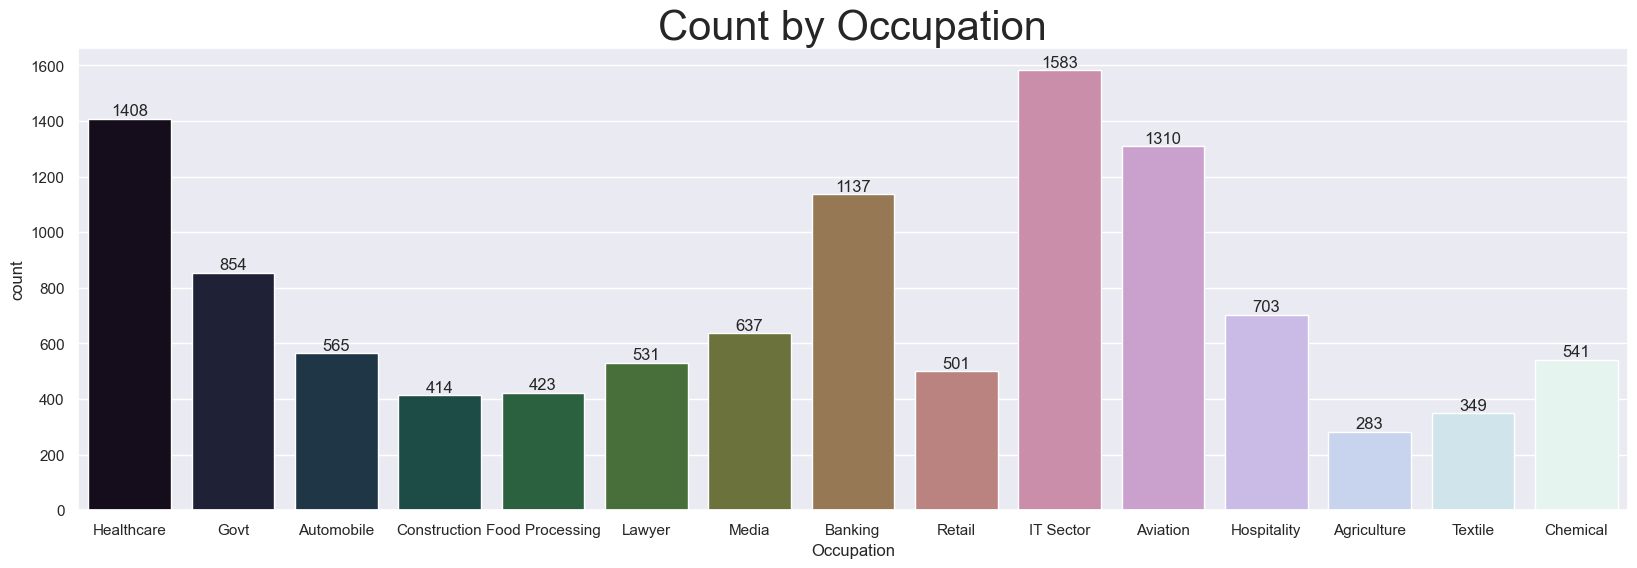

In [59]:
ax = sns.countplot(data = data, x = 'Occupation', palette = 'cubehelix')
sns.set(rc={'figure.figsize': (20,6)})
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Count by Occupation", fontsize = 30)
plt.show()

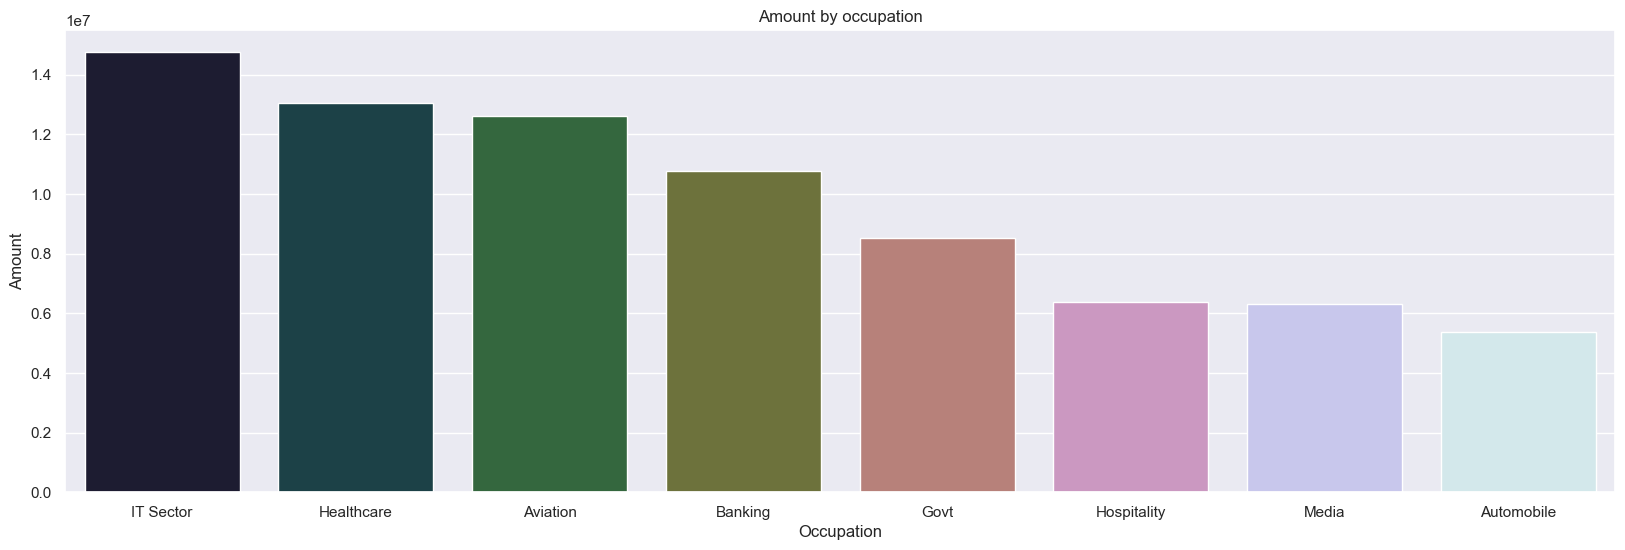

In [60]:
occ = data.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(8)
sns.barplot(data = occ, x = 'Occupation', y = 'Amount',palette = 'cubehelix')
plt.title("Amount by occupation")
plt.show()

# Product Category

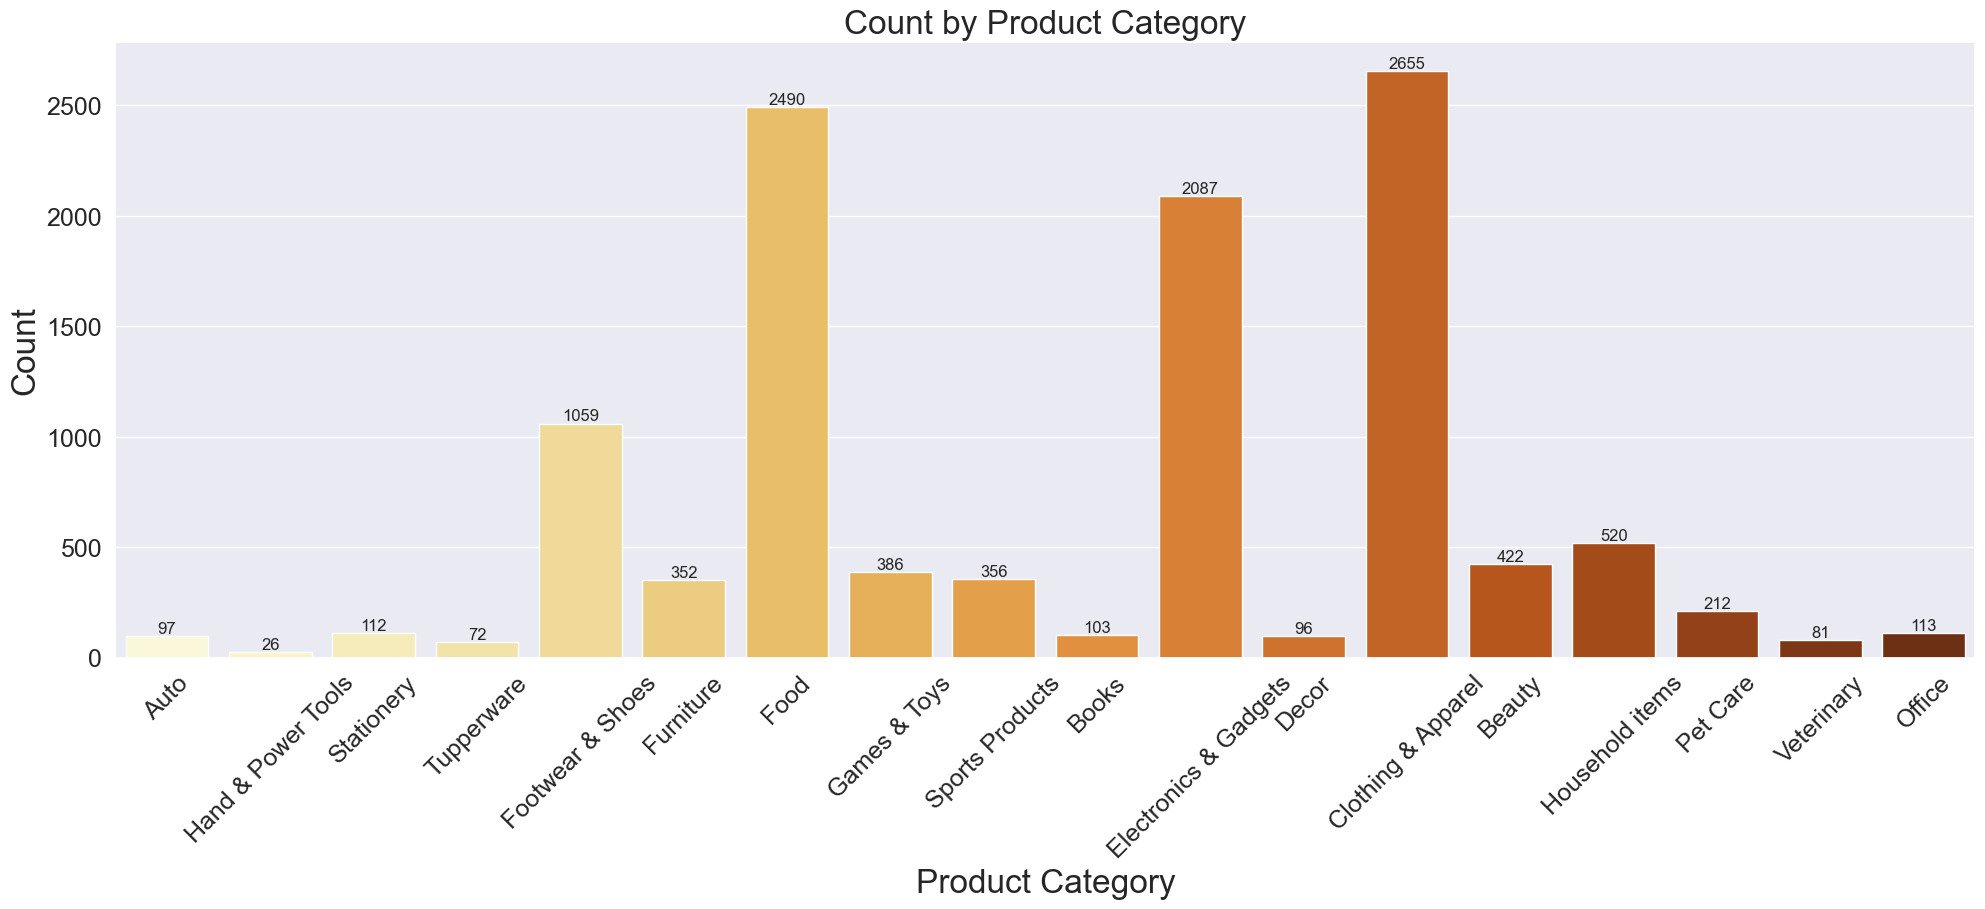

In [65]:
sns.set(rc={'figure.figsize': (24,8)})
ax = sns.countplot(data = data, x = 'Product_Category', palette = "YlOrBr")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Count by Product Category", fontsize = 24)
plt.xlabel("Product Category", fontsize = 24)
plt.ylabel('Count', fontsize = 24)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

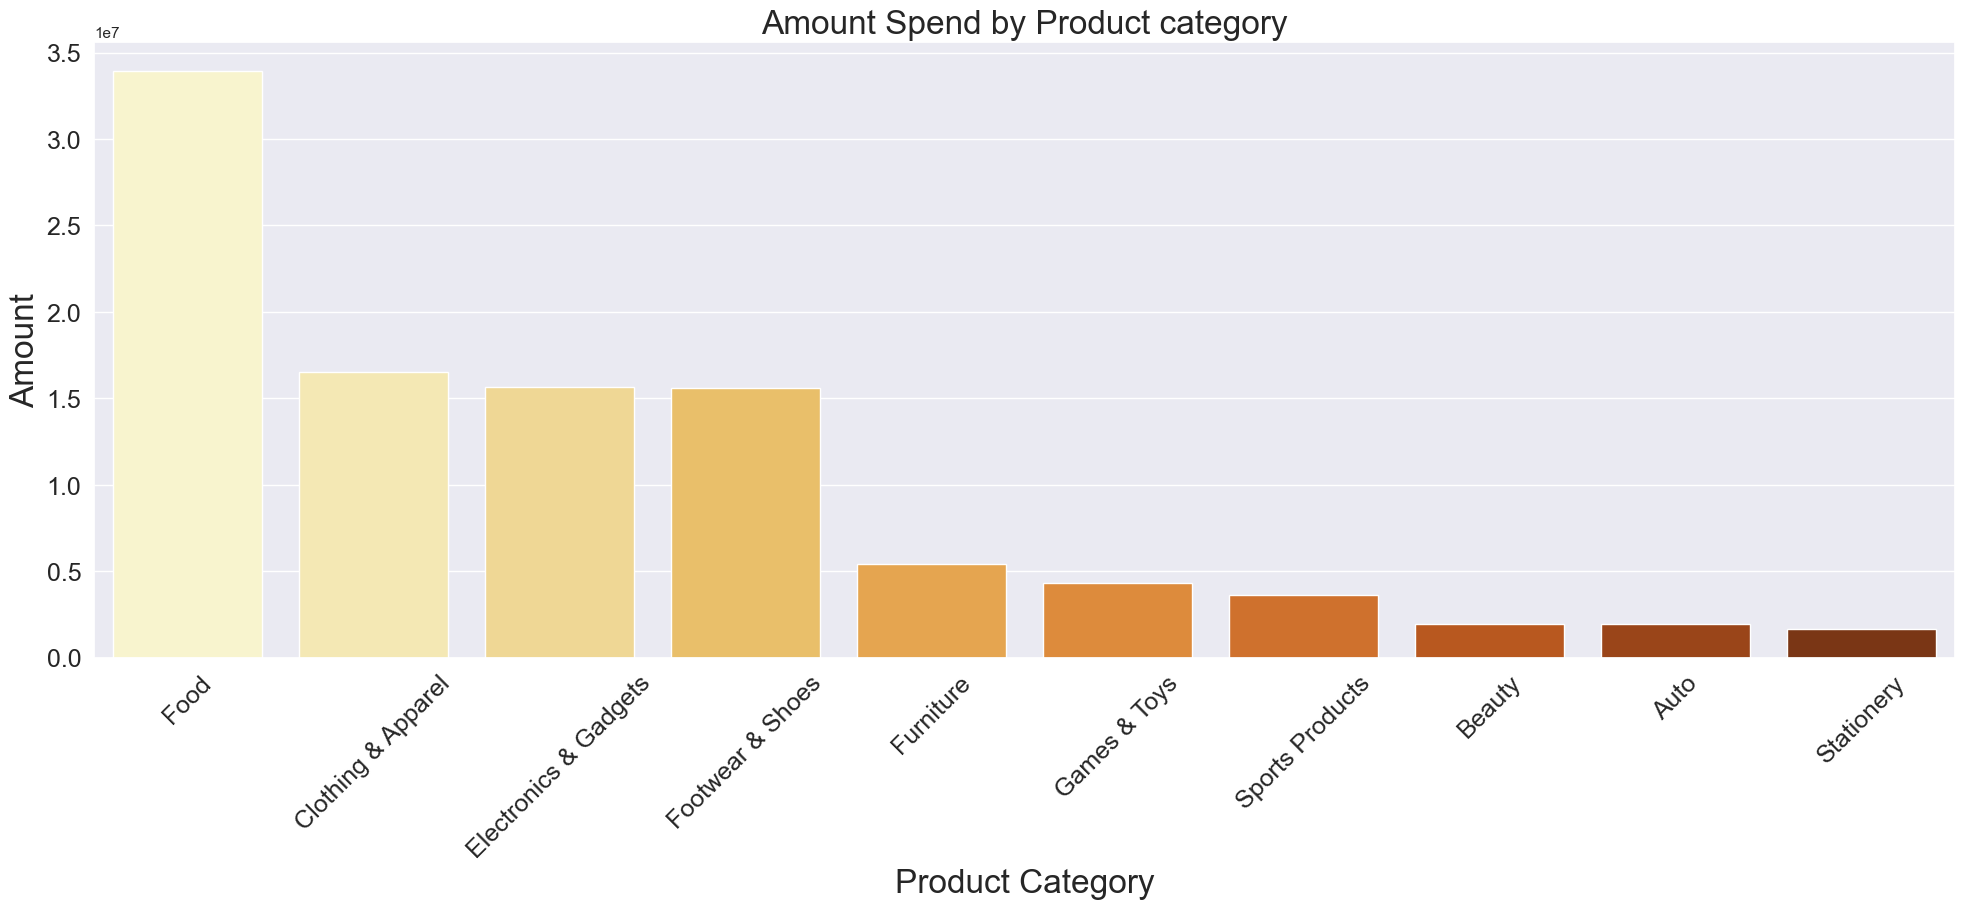

In [68]:
Pro_Category = data.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(10)
sns.barplot(data = Pro_Category, x = 'Product_Category', y = 'Amount', palette = "YlOrBr")
plt.title("Amount Spend by Product category",fontsize = 24)
plt.xlabel("Product Category", fontsize = 24)
plt.ylabel('Amount', fontsize = 24)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

# Top selling (orders) Products on the basis of Product_ID

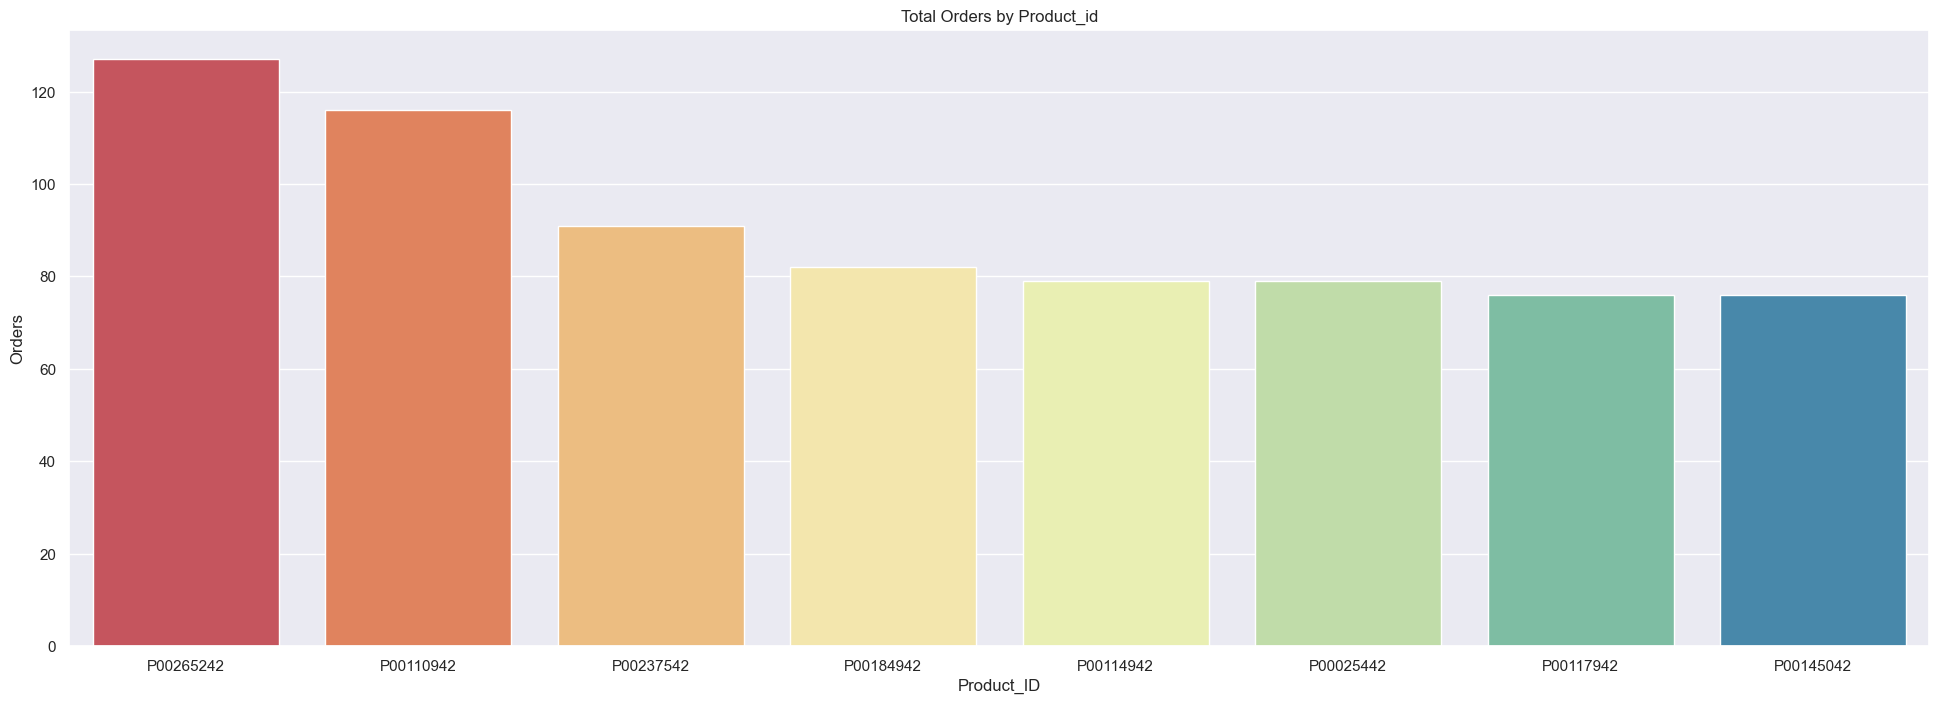

In [70]:
Product_cat = data.groupby(['Product_ID'], as_index = False) ['Orders'].sum().sort_values(by = 'Orders',ascending = False).head(8)
sns.barplot(data = Product_cat, x = 'Product_ID', y = 'Orders', palette = "Spectral")
plt.title("Total Orders by Product_id")
plt.show()

In [ ]:
Data Insights:

Most of the buyers are females and even the purchasing power of females are greater than men.
We can see that most of the buyers are of age group btw 25-35 yrs female.
Most of the orders are from State Uttar Pradesh, Maharashtra, Karnataka and Delhi respectively.
Most of the buyers are married(woman) and they have high purchasing power too on the basis of Marital_Status.
We can clearly see that basis of Occupation most of the buyers are working at IT, Healthcare, Aviation and banking sector
On the basis of Product_category most of the sold products are from Food, clothing & Apparel, Electronics & Gadgets, Footwear & shoes category.